In [316]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import pickle
import shap
shap.initjs()

In [4]:
mapping = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
     10: 'Music',
     15: 'Pets & Animals',
     17: 'Sports',
     18: 'Short Movies',
     19: 'Travel & Events',
     20: 'Gaming',
     21: 'Videoblogging',
     22: 'People & Blogs',
     23: 'Comedy',
     24: 'Entertainment',
     25: 'News & Politics',
     26: 'Howto & Style',
     27: 'Education',
     28: 'Science & Technology',
     29: 'Nonprofits & Activism',
     30: 'Movies',
     31: 'Anime/Animation',
     32: 'Action/Adventure',
     33: 'Classics',
     34: 'Comedy',
     35: 'Documentary',
     36: 'Drama',
     37: 'Family',
     38: 'Foreign',
     39: 'Horror',
     40: 'Sci-Fi/Fantasy',
     41: 'Thriller',
     42: 'Shorts',
     43: 'Shows',
     44: 'Trailers'
}

In [5]:
obvious_columns = [
#     'category_id',
 'views',
 'likes',
 'dislikes',
 'comment_count',
#  'pub_day_of_the_week',
#  'pub_day',
#  'pub_hour',
 'dislikes/likes',
 'likes/views',
 'dislikes/views',
 'comment_count/views',
#  'n_of_tags',
#  'title_length',
#  'title_n_of_words',
#  'title_capital_letters',
#  'title_capital_letters_percent',
#  'title_small_letters',
#  'title_small_letters_percent',
#  'title_punctuation',
#  'title_punctuation_percent',
#  'title_n_of_emojis',
#  'desc_length',
#  'desc_n_of_words',
#  'desc_capital_letters',
#  'desc_capital_letters_percent',
#  'desc_small_letters',
#  'desc_small_letters_percent',
#  'desc_punctuation',
#  'desc_punctuation_percent',
#  'desc_n_of_urls',
#  'desc_n_of_emojis',
#  'isFacebook',
#  'isTwitter',
#  'isInstagram',
#  'mean_h',
#  'mean_s',
#  'mean_v',
#  'std_h',
#  'std_s',
#  'std_v',
#  'entropy',
#  'avg_texts_coordX',
#  'avg_texts_coordY',
#  'ocr_sentiment_compound',
#  'Sad',
#  'Fear',
#  'Angry',
#  'Happy',
#  'Neutral',
#  'Surprise',
#  'people',
#  'faces',
#  'trending'
]

### Z outlierami

In [6]:
# df = pd.read_csv('../../our_data/Etap5/Etap3/all_for_FI.csv')
# scaler = pickle.load(open("../Etap5/scaler.pkl", 'rb'))

# del df['video_id']
# df = df.fillna(-1)
# print(df.shape)
# df[:3]

### Bez outlierów

In [107]:
df = pd.read_csv('../../our_data/Etap5/Etap3/all_for_FI_without_outliers.csv')
scaler = pickle.load(open("../Etap5/scaler_without_outliers.pkl", 'rb'))

# df = pd.read_csv('../../our_data/Etap5/Etap3/all_for_FI_without_outliers_ONE_HOT.csv')
# scaler = pickle.load(open("../Etap5/scaler_without_outliers_ONE_HOT.pkl", 'rb'))

del df['video_id']
df = df.fillna(-1)
print(df.shape)
df[:3]

(15445, 54)


,category_id,views,likes,dislikes,comment_count,pub_day_of_the_week,pub_day,pub_hour,dislikes/likes,likes/views,dislikes/views,comment_count/views,n_of_tags,title_length,title_n_of_words,title_capital_letters,title_capital_letters_percent,title_small_letters,title_small_letters_percent,title_punctuation,title_punctuation_percent,title_n_of_emojis,desc_length,desc_n_of_words,desc_capital_letters,desc_capital_letters_percent,desc_small_letters,desc_small_letters_percent,desc_punctuation,desc_punctuation_percent,desc_n_of_urls,desc_n_of_emojis,isFacebook,isTwitter,isInstagram,mean_h,mean_s,mean_v,std_h,std_s,std_v,entropy,avg_texts_coordX,avg_texts_coordY,ocr_sentiment_compound,Sad,Fear,Angry,Happy,Neutral,Surprise,people,faces,trending
0,10,3.156279,6.860132,0.530014,3.044567,-1.478162,0.920080,0.222228,-0.247672,0.239150,-0.061108,-0.022347,-0.981476,0.292420,-0.547389,-0.036612,-0.208537,-0.621686,-1.139866,4.644111,4.195544,-0.097413,-1.003053,-0.898497,-0.593204,1.505147,-1.029948,-1.452863,-0.614837,0.741770,-0.896669,-0.243586,0,0,0,-0.605053,-1.482737,0.972724,-0.219746,-1.423649,0.201933,-0.070243,-1.193143,-1.434435,-0.115615,-0.441187,-0.289289,-0.403271,-0.556994,-0.480048,-0.116932,0.939693,-0.781259,0
1,10,2.701422,7.622910,0.180755,4.367196,0.151210,-1.659686,0.222228,-0.253289,0.490361,-0.062387,-0.022341,2.076977,-1.566546,-1.388068,-0.748343,-0.067582,-1.470444,-1.144482,-0.637835,0.191015,-0.097413,-0.925557,-0.926032,-0.642138,-0.586878,-0.926245,0.074061,-0.730161,2.640549,-0.356408,-0.243586,1,0,1,0.299640,-1.045710,0.476901,0.229982,-0.763544,-0.607451,-0.143248,-1.193143,-1.434435,-0.115615,-0.441187,-0.289289,-0.403271,-0.556994,1.142347,-0.116932,-0.452174,-0.246892,0
2,10,-0.178126,-0.392521,-0.443310,-0.437885,0.694334,-0.487065,-1.438592,-0.213505,-0.507029,-0.062269,-0.022353,-0.498563,0.744601,-0.547389,-0.273855,-0.519735,0.945252,0.522113,3.059527,2.185463,-0.097413,-0.910796,-0.806716,-0.560581,0.417990,-0.915134,-0.030460,-0.730161,-0.403498,-0.761604,0.673798,0,0,0,1.204014,2.172123,0.680729,-0.566376,1.549637,0.235831,0.531390,1.614983,0.332041,1.507315,-0.441187,-0.289289,-0.403271,-0.556994,-0.480048,-0.116932,-0.591361,-0.781259,0


### Dzielenie zbioru

In [8]:
from sklearn.model_selection import train_test_split
# for col in df.columns:
#     temp = df[col].isna()
#     print(f"{col}:, {temp.any()} {temp.sum()}")

X_train, X_test, y_train, y_test = train_test_split(df.loc[:,~df.columns.isin(['trending'])], 
                                                    df['trending'], 
                                                    test_size=0.3,
                                                    random_state=42
                                                   )

print(f'X_train_unlabeled: ', X_train.shape)
print(f'y_train_unlabeled: ', y_train.shape)
print(f'X_test_unlabeled: ', X_test.shape)
print(f'y_test_unlabeled: ', y_test.shape)

# Do Shapa
sample_set = shap.sample(X_test, 100)

columns_not_to_standarize = [
    'video_id', 'category_id', 'trending',
    'isFacebook', 'isTwitter', 'isInstagram', 
]

sample_set_not_standarized = sample_set.copy()
sample_set_not_standarized.loc[:, sample_set_not_standarized.columns.difference(columns_not_to_standarize)] = scaler.inverse_transform(sample_set_not_standarized.loc[:, sample_set_not_standarized.columns.difference(columns_not_to_standarize)].values)
sample_set_not_standarized[:3]

X_train_unlabeled:  (10811, 53)
y_train_unlabeled:  (10811,)
X_test_unlabeled:  (4634, 53)
y_test_unlabeled:  (4634,)


### Uczenie

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

parameters = {
    'LogisticRegression': [
        {
            'clf': (LogisticRegression(n_jobs=-1),),
            'clf__max_iter': [100, 500, 1000],
            'clf__solver': ['liblinear', 'lbfgs'],
            'clf__C': [0.1, 1.0, 10.0]
        }
    ],
    'RandomForestClassifier': [
        {
            'clf': (RandomForestClassifier(n_jobs=-1),),
            'clf__n_estimators': [10, 100],
            'clf__criterion': ['entropy', 'gini'],
            'clf__max_depth': [None, 5, 10]
        }
    ],
    'SVC': [
        {
            'clf': (SVC(),),
            'clf__C': [0.1, 1.0, 10.0],
            'clf__kernel': ['linear', 'rbf'],
        }
    ]
}

pipeline = Pipeline([
    ('clf', LogisticRegression()),
])

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
best_each_classifier = {}
for classifier_name, params in parameters.items():
    grid_search = GridSearchCV(estimator=pipeline, 
                               param_grid=params, 
                               scoring=scoring,
                               refit='Accuracy',
                               n_jobs=-1)

    clf = grid_search.fit(X_train, y_train)
    
    best_index = clf.best_index_
    best_each_classifier[classifier_name] = {
        'mean_accuracy': clf.cv_results_['mean_test_Accuracy'][best_index],
        'mean_AUC': clf.cv_results_['mean_test_AUC'][best_index],
        'std_accuracy': clf.cv_results_['std_test_Accuracy'][best_index],
        'std_AUC': clf.cv_results_['std_test_AUC'][best_index],
        'estimator': clf.best_estimator_,
    }
    
# pickle.dump(best_each_classifier, open('./results.pkl', 'wb'))
pickle.dump(best_each_classifier, open('./results_ONE_HOT.pkl', 'wb'))

In [9]:
best_each_classifier = pickle.load(open('./results.pkl', 'rb'))
# best_each_classifier = pickle.load(open('./results_ONE_HOT.pkl', 'rb'))

### LogisticRegression

In [14]:
best_each_classifier = pickle.load(open('./results.pkl', 'rb'))

print(f"Accuracy mean: { best_each_classifier['LogisticRegression']['estimator']['clf']}")
print(f"Accuracy mean: {best_each_classifier['LogisticRegression']['mean_accuracy']}")
print(f"Accuracy std: {best_each_classifier['LogisticRegression']['std_accuracy']}")
print(f"AUC mean: {best_each_classifier['LogisticRegression']['mean_AUC']}")
print(f"AUC std: {best_each_classifier['LogisticRegression']['std_AUC']}")

estimator = best_each_classifier['LogisticRegression']['estimator']['clf']

log_odds = np.exp(estimator.coef_[0])
pd.DataFrame(log_odds, 
             X_test.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)


# Przykład mamy 4.678 razy większą szansę na bycie w klasie 1 niż w klasie 0 za każdy jednostkowy wzrost wartości likes/views

Accuracy mean: LogisticRegression(C=10.0, n_jobs=-1, solver='liblinear')
Accuracy mean: 0.7435020825822223
Accuracy std: 0.004588274135253091
AUC mean: 0.8205963384992658
AUC std: 0.006861497115503511


,coef
desc_small_letters,82.721750
likes/views,4.678088
desc_n_of_words,4.406580
desc_capital_letters,3.589647
desc_n_of_urls,1.899004
dislikes,1.768028
dislikes/likes,1.668635
comment_count,1.596405
desc_punctuation,1.250208
avg_texts_coordY,1.167401


#### SHAP

In [17]:
# df_temp = pd.read_csv('../../our_data/Etap5/Etap3/all_for_FI_without_outliers_catNames.csv')
# del df_temp['video_id']
# category_map = gen_category_map(df_temp)
# category_map

In [18]:
# %pip install alibi[shap]
# %pip install alibi[ray] 

In [19]:
# groups = list(range(0, 52))
# groups = [[x] for x in groups]
# groups = groups + [list(range(52, 67))]
# # groups

In [20]:
# category_map = {52: ['Autos & Vehicles',
#   'Comedy',
#   'Education',
#   'Entertainment',
#   'Film & Animation',
#   'Gaming',
#   'Howto & Style',
#   'Music',
#   'News & Politics',
#   'Nonprofits & Activism',
#   'People & Blogs',
#   'Pets & Animals',
#   'Science & Technology',
#   'Sports',
#   'Travel & Events']}

  0%|          | 0/100 [00:00<?, ?it/s]

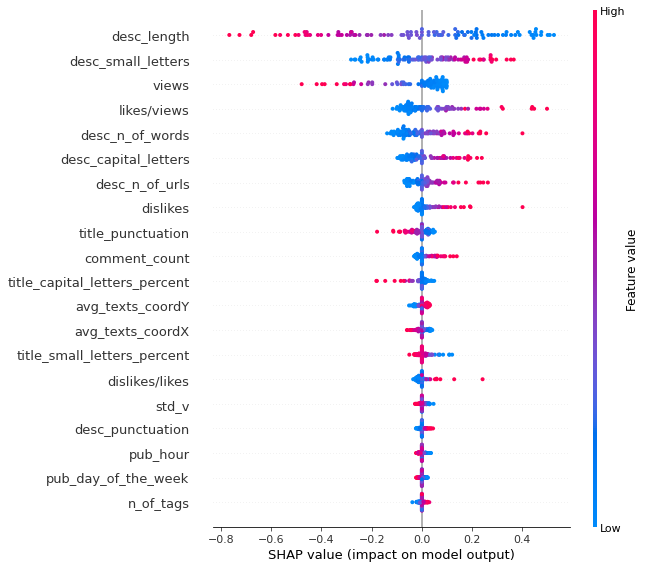

In [200]:
# from alibi.explainers import KernelShap
# from alibi.utils.data import gen_category_map

estimator = best_each_classifier['LogisticRegression']['estimator']['clf']


# explainer = shap.Explainer(estimator.predict_proba,
#                                 shap.sample(X_train, 50),
# #                                 data=X_train,                         
#                                 feature_names=list(X_train.columns))


# shap_values = explainer(sample_set) 
# shap.summary_plot(shap_values.data, sample_set, X_test.columns)

explainer = shap.KernelExplainer(model=estimator.predict_proba,
                                data=shap.sample(X_train, 50),
#                                 data=X_train,                         
                                feature_names=list(X_train.columns))


shap_values = explainer.shap_values(sample_set) 

In [ ]:
### Here, all the values on the left represent the observations that shift the predicted value in the negative direction 
### while the points on the right contribute to shifting the prediction in a positive direction. 
shap.summary_plot(shap_values[1], sample_set, X_test.columns)

In [326]:
class_id = 1
sample_id = 10

shap.force_plot(
    explainer.expected_value[class_id],
    lr_explanation.shap_values[class_id][sample_id,:],
    sample_set_not_standarized[sample_id:sample_id+1],
    X_test.columns,
)

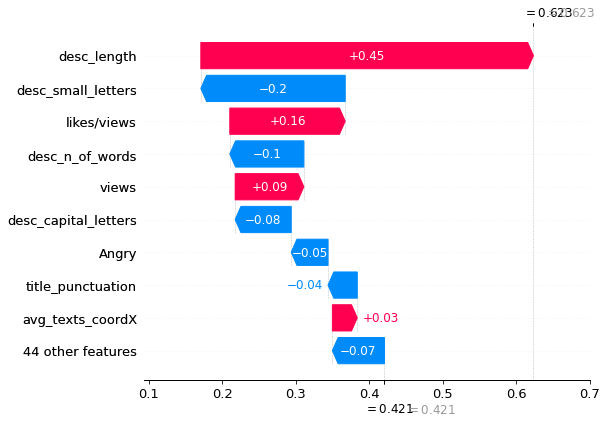

In [331]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[class_id], shap_values[class_id][sample_id], feature_names=X_test.columns)

In [147]:
class_id = 1
shap.force_plot(
    explainer.expected_value[class_id],
    lr_explanation.shap_values[class_id],
    sample_set_not_standarized,
)

In [329]:
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
from pathlib import Path

def save_dependency_plots(shap_values, clf_name, sample_set_not_standarized):
    columns = sample_set_not_standarized.columns
    for i, col in enumerate(columns):
    #     ax = plt.subplot(n_rows, n_cols, i+1)
        shap.dependence_plot(col, shap_values[1], sample_set_not_standarized, show=False)

        col = col.replace('/', '-')
        path = Path(f"./Shap_plots/{clf_name}/")
        path.mkdir(parents=True, exist_ok=True)

        plt.savefig(str(path) + f"/dependency_{col}.png")
        plt.close()

save_dependency_plots(shap_values=shap_values,
                      clf_name='LogisticRegression',
                      sample_set_not_standarized=sample_set_not_standarized)     

#### One-hot

In [9]:
# best_each_classifier = pickle.load(open('./results_ONE_HOT.pkl', 'rb'))

# print(f"Accuracy mean: { best_each_classifier['LogisticRegression']['estimator']['clf']}")
# print(f"Accuracy mean: {best_each_classifier['LogisticRegression']['mean_accuracy']}")
# print(f"Accuracy std: {best_each_classifier['LogisticRegression']['std_accuracy']}")
# print(f"AUC mean: {best_each_classifier['LogisticRegression']['mean_AUC']}")
# print(f"AUC std: {best_each_classifier['LogisticRegression']['std_AUC']}")

# estimator = best_each_classifier['LogisticRegression']['estimator']['clf']

# log_odds = np.exp(estimator.coef_[0])
# pd.DataFrame(log_odds, 
#              X_test.columns, 
#              columns=['coef'])\
#             .sort_values(by='coef', ascending=False)


# # Przykład mamy 4.678 razy większą szansę na bycie w klasie 1 niż w klasie 0 za każdy jednostkowy wzrost wartości likes/views

Accuracy mean: LogisticRegression(C=10.0, n_jobs=-1)
Accuracy mean: 0.7491451768730089
Accuracy std: 0.005263984341797739
AUC mean: 0.8246183255309267
AUC std: 0.00822824322644977


,coef
desc_small_letters,70.441581
likes/views,5.143172
desc_n_of_words,4.353290
desc_capital_letters,3.437197
desc_n_of_urls,1.903111
...,...
comment_count/views,0.533414
category_Nonprofits & Activism,0.460787
dislikes/views,0.251632
views,0.164176


### RandomForestClassifier

In [108]:
from sklearn.tree import export_graphviz
from graphviz import Source
import graphviz

print(f"Accuracy mean: {best_each_classifier['RandomForestClassifier']['estimator']['clf']}")
print(f"Accuracy mean: {best_each_classifier['RandomForestClassifier']['mean_accuracy']}")
print(f"Accuracy std: {best_each_classifier['RandomForestClassifier']['std_accuracy']}")
print(f"AUC mean: {best_each_classifier['RandomForestClassifier']['mean_AUC']}")
print(f"AUC std: {best_each_classifier['RandomForestClassifier']['std_AUC']}")

# HALO tutaj wybieram tak losowo 5 drzewo, no bo jak inaczej?
estimator = best_each_classifier['RandomForestClassifier']['estimator']['clf'].estimators_[5]


# Save png
exp_graph = export_graphviz(estimator, out_file=None, 
                feature_names = X_test.columns,
                class_names = ['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
graph = Source(exp_graph)
graph.format = 'png'
graph.render('dtree_render')

Accuracy mean: RandomForestClassifier(criterion='entropy', n_jobs=-1)
Accuracy mean: 0.8068645023550136
Accuracy std: 0.006456942621053099
AUC mean: 0.8909965583077606
AUC std: 0.005601641492103354


'dtree_render.png'

#### SHAP

In [ ]:
# HALO tutaj wybieram tak losowo 5 drzewo, no bo jak inaczej?
estimator = best_each_classifier['RandomForestClassifier']['estimator']['clf'].estimators_[5]

explainer = shap.KernelExplainer(model=estimator.predict_proba,
                                data=shap.sample(X_train, 50),
#                                 data=X_train,                         
                                feature_names=list(X_train.columns))


shap_values = explainer.shap_values(sample_set) 

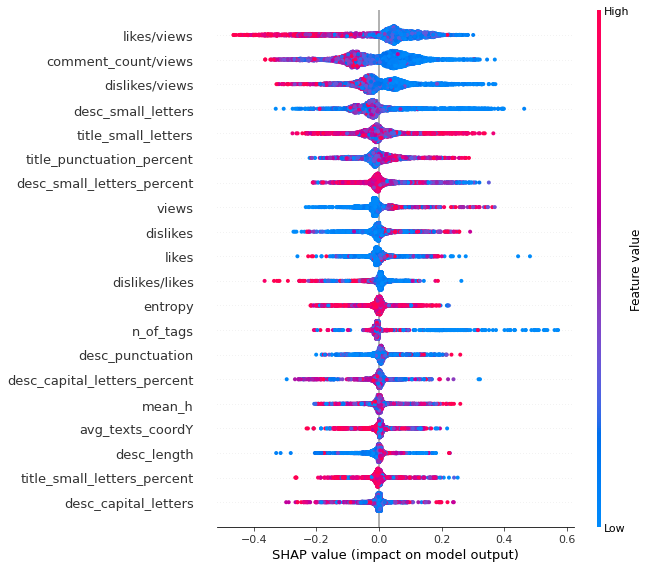

In [28]:
# HALO tutaj wybieram tak losowo 5 drzewo, no bo jak inaczej?
estimator = best_each_classifier['RandomForestClassifier']['estimator']['clf'].estimators_[5]

shap.initjs()
explainer = shap.TreeExplainer(estimator)
# obtain shap values for the test data
shap_values = explainer.shap_values(X_test) 
shap.summary_plot(shap_values[0], X_test)
# shap.summary_plot(shap_values[1], X_test)


#### One Hot

In [10]:
from sklearn.tree import export_graphviz
from graphviz import Source
import graphviz

print(f"Accuracy mean: {best_each_classifier['RandomForestClassifier']['estimator']['clf']}")
print(f"Accuracy mean: {best_each_classifier['RandomForestClassifier']['mean_accuracy']}")
print(f"Accuracy std: {best_each_classifier['RandomForestClassifier']['std_accuracy']}")
print(f"AUC mean: {best_each_classifier['RandomForestClassifier']['mean_AUC']}")
print(f"AUC std: {best_each_classifier['RandomForestClassifier']['std_AUC']}")

# HALO tutaj wybieram tak losowo 5 drzewo, no bo jak inaczej?
estimator = best_each_classifier['RandomForestClassifier']['estimator']['clf'].estimators_[5]


# Save png
exp_graph = export_graphviz(estimator, out_file=None, 
                feature_names = X_test.columns,
                class_names = ['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
graph = Source(exp_graph)
graph.format = 'png'
graph.render('dtree_render_ONE_HOT')

Accuracy mean: RandomForestClassifier(criterion='entropy', n_jobs=-1)
Accuracy mean: 0.8072339741245734
Accuracy std: 0.009057116090450274
AUC mean: 0.8920535474894301
AUC std: 0.006571917933013941


'dtree_render_ONE_HOT.png'

### SVC

In [9]:
import seaborn as sns
import shap

print(f"Accuracy mean: {best_each_classifier['SVC']['estimator']['clf']}")
print(f"Accuracy mean: {best_each_classifier['SVC']['mean_accuracy']}")
print(f"Accuracy std: {best_each_classifier['SVC']['std_accuracy']}")
print(f"AUC mean: {best_each_classifier['SVC']['mean_AUC']}")
print(f"AUC std: {best_each_classifier['SVC']['std_AUC']}")

estimator = best_each_classifier['SVC']['estimator']['clf']

shap.initjs()
explainer = shap.KernelExplainer(estimator.decision_function, data=shap.sample(X_test, 5))
# obtain shap values for the test data
# TODO przydałoby się chyba zwiększyć te k, i wyżej też jest shap.sample(X_test, 5) - też nwm czy 5 nie za mało, ale długo się robi
k = 100
shap_values = explainer.shap_values(X_test[:k]) 

Accuracy mean: SVC(C=10.0)
Accuracy mean: 0.7619097229795703
Accuracy std: 0.005924790578815786
AUC mean: 0.8419401436324785
AUC std: 0.006949211565227907


  0%|          | 0/100 [00:00<?, ?it/s]

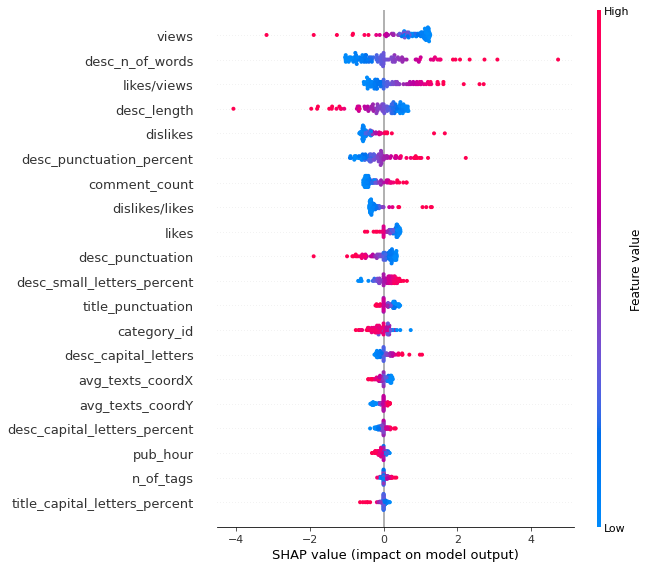

In [15]:
shap.summary_plot(shap_values, X_test[:k])

In [7]:
import seaborn as sns
import shap

model = clf.best_estimator_['clf']

shap.initjs()
explainer = shap.TreeExplainer(model)

# obtain shap values for the test data
shap_values = explainer.shap_values(X_test)

# i = 10
# shap_values = explainer.shap_values(X_test.iloc[i])
# shap.force_plot(explainer.expected_value[i], shap_values[i], X_test.iloc[i]) 

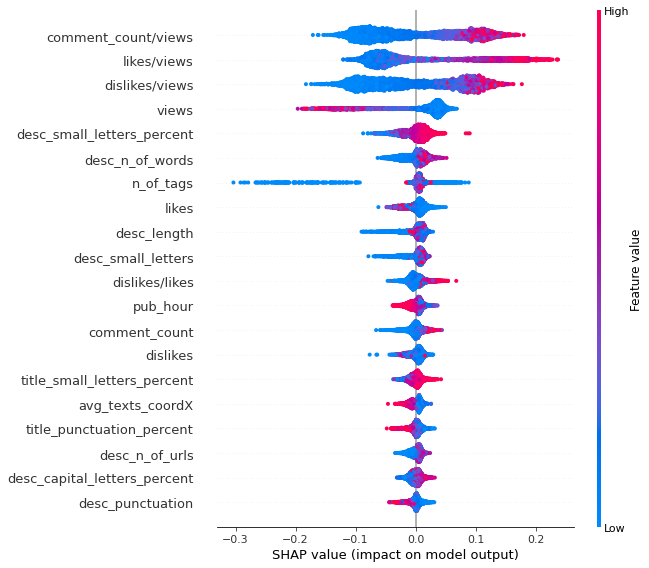

In [8]:
shap.summary_plot(shap_values[1], X_test, class_names=model.classes_)

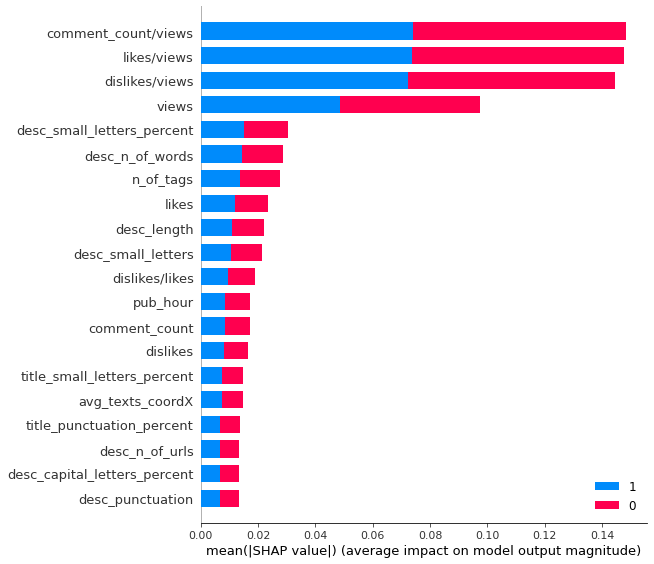

In [15]:
shap.summary_plot(shap_values, X_test, class_names=model.classes_)

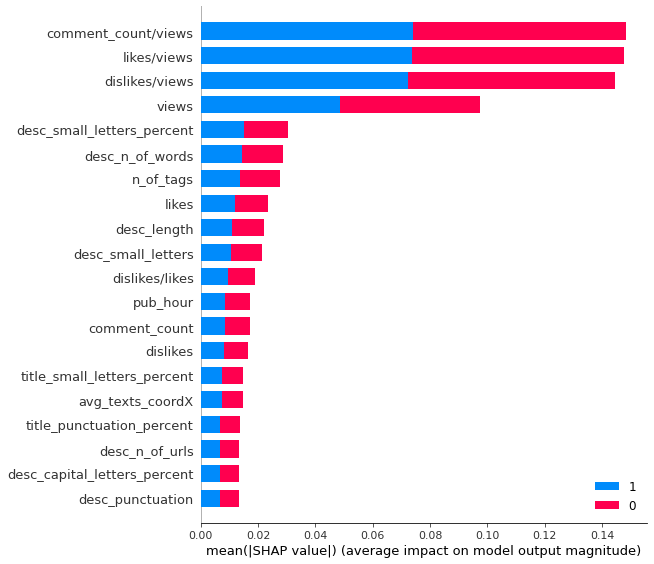

In [14]:
shap.summary_plot(shap_values, X_test, plot_type='bar', class_names=model.classes_)

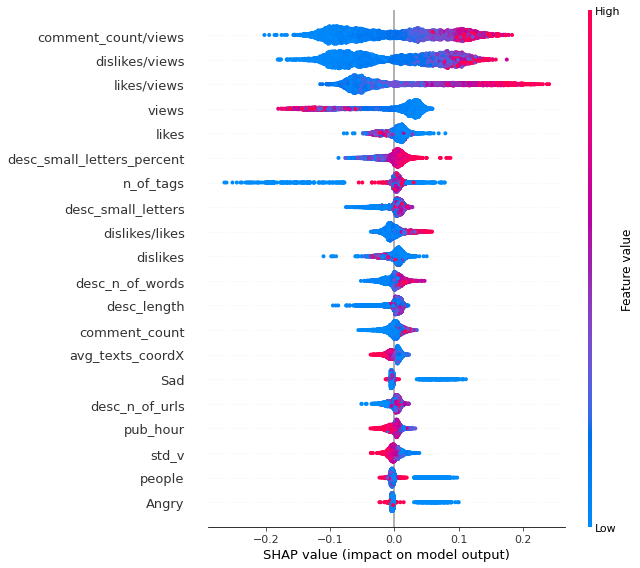

In [149]:
shap.summary_plot(shap_values[1], X_test)

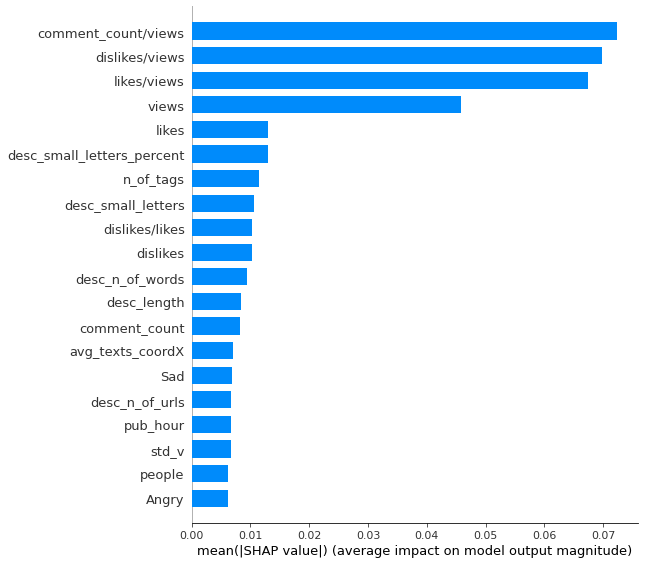

In [150]:
shap.summary_plot(shap_values[1], X_test, plot_type='bar')

### Bez outlierów

In [112]:
df = pd.read_csv('../../our_data/Etap5/Etap3/all_for_FI_without_outliers.csv')
scaler = pickle.load(open("../Etap5/scaler_without_outliers.pkl", 'rb'))

del df['video_id']
df = df.fillna(-1)
print(df.shape)
df[:3]